In [1]:
import pandas as pd
import numpy as np
import ScatterHist as sh
from sklearn import decomposition

from sklearn.model_selection import train_test_split
import sklearn.preprocessing as prep

import os.path
from Calibration_Util import FileIO as io

In [2]:
# get data paths

combinedDataPath = os.path.join(io.DeepLearningRoot(), 'data/data-lognorm-names-df.csv')
sourcePath = os.path.join(io.DeepLearningRoot(), 'data/rnaBatch1-gtex-20PCs.csv')
targetPath = os.path.join(io.DeepLearningRoot(), 'data/rnaBatch2-tcga-20PCs.csv')
calibratedSourcePath = os.path.join(io.DeepLearningRoot(), 'data/calibratedBatch1-gtex-20PCs.csv')

In [3]:
# read data and print data shape

combined = pd.read_csv(combinedDataPath, sep = ',', header = 0, index_col = 0)
source = pd.read_csv(sourcePath, sep=',', header=0, index_col=False)
target = pd.read_csv(targetPath, sep=',', header=0, index_col=False)
calibrated_source = pd.read_csv(calibratedSourcePath, sep=',', header=0, index_col=0)

print("combined shape = " + str(combined.shape))
print("gtex = source shape = " + str(source.shape))
print("tcga = target shape = " + str(target.shape))
print("gtex = calibrated source shape = " + str(calibrated_source.shape))

combined shape = (468, 21)
gtex = source shape = (239, 20)
tcga = target shape = (229, 20)
gtex = calibrated source shape = (239, 20)


In [7]:
# display combined df

print(list(combined.index))

['GTEX.S4UY.0926.SM.4AD6O.bladder.', 'GTEX.S4Q7.0926.SM.4AD5D.bladder.', 'GTEX.U3ZN.1226.SM.4DXUD.bladder.', 'GTEX.TMMY.1526.SM.4DXST.bladder.', 'GTEX.S32W.1126.SM.4AD5V.bladder.', 'GTEX.S3XE.1226.SM.4AD4L.bladder.', 'GTEX.SNOS.0526.SM.4DM54.bladder.', 'GTEX.SNMC.0826.SM.4DM66.bladder.', 'GTEX.SE5C.1026.SM.4BRUG.bladder.', 'GTEX.U4B1.1226.SM.4DXT7.bladder.', 'GTEX.U3ZM.0826.SM.4DXU6.bladder.', 'GTEX.V955.2026.SM.3GAFA.breast.', 'GTEX.VUSG.2226.SM.4KKZO.breast.', 'GTEX.XYKS.1326.SM.4BRUN.breast.', 'GTEX.S341.1526.SM.4AD6K.breast.', 'GTEX.XMD1.0826.SM.4AT52.breast.', 'GTEX.T2YK.2226.SM.32QPT.breast.', 'GTEX.QVJO.1826.SM.447C9.breast.', 'GTEX.XOT4.0726.SM.4GIAW.breast.', 'GTEX.T6MN.0726.SM.32PML.breast.', 'GTEX.UJHI.1426.SM.3DB9C.breast.', 'GTEX.VJWN.0726.SM.3GIJ8.breast.', 'GTEX.XGQ4.0926.SM.4AT4U.breast.', 'GTEX.S4UY.0726.SM.4AD6X.breast.', 'GTEX.R3RS.0626.SM.48FE1.breast.', 'GTEX.QEL4.2126.SM.447AE.breast.', 'GTEX.WY7C.2726.SM.3NB3P.breast.', 'GTEX.WYBS.0926.SM.3NM94.breast.', 'GTEX.WY

In [274]:
# Do PCA for plotting
pca = decomposition.PCA()
pca.fit(target)

# project data onto PCs
target_sample_pca = pca.transform(target)
projection_before = pca.transform(source)
projection_after = pca.transform(calibrated_source)

# choose PCs to plot
pc1 = 0
pc2 = 1
pc3 = 2
axis1 = 'PC'+str(pc1)
axis2 = 'PC'+str(pc2)
axis3 = 'PC'+str(pc3)

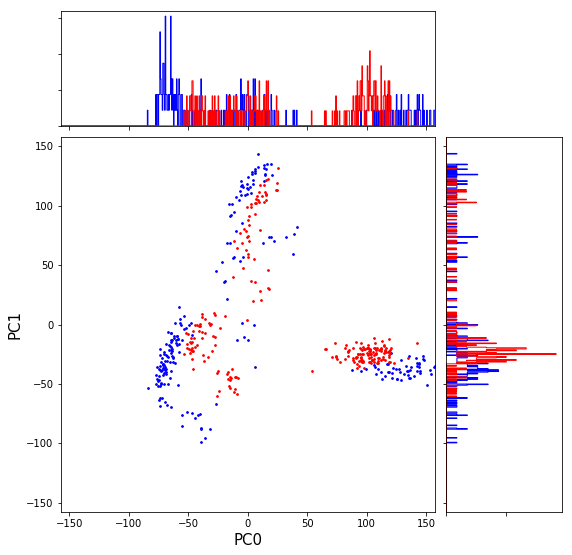

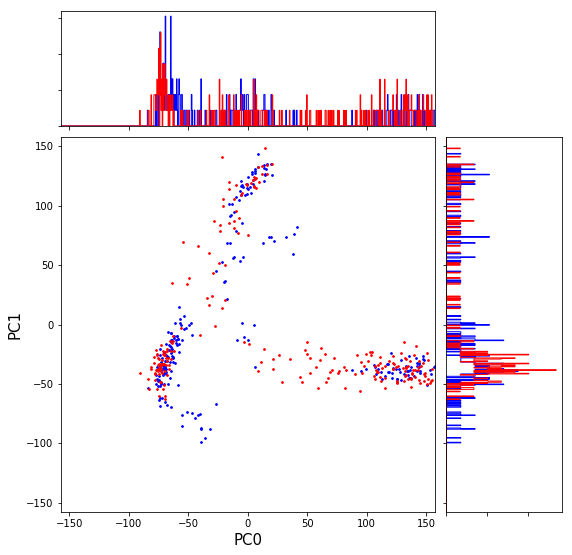

In [275]:
# before
sh.scatterHist(target_sample_pca[:,pc1], target_sample_pca[:,pc2], projection_before[:,pc1], 
               projection_before[:,pc2], axis1, axis2)
# after
sh.scatterHist(target_sample_pca[:,pc1], target_sample_pca[:,pc2], projection_after[:,pc1], 
               projection_after[:,pc2], axis1, axis2)

In [276]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

def multiScatterHist(x1, x2, y1, y2, colors1, colors2, axis1='', axis2=''):
    nullfmt = NullFormatter()         # no labels
    
    # sanity check
    print("colors1 shape = " + str(colors1.shape) + " colors2 shape = " + str(colors2.shape))
    print("x1 shape = " + str(x1.shape) + " x2 shape = " + str(x2.shape))
    print("y1 shape = " + str(y1.shape) + " y2 shape = " + str(y2.shape))
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]
    
    # start with a rectangular Figure
    plt.figure(figsize=(12, 12))
       
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    
    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)
    
    # the scatter plot:
    axScatter.scatter(x1, x2, color=colors1, marker='o', s=20)
    axScatter.scatter(y1, y2, color=colors2, marker='s', facecolors='none', s=20) 


    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(x2))]) + 10
    lim = (int(xymax/binwidth) + 1) * binwidth
    
    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))
    
    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x1, bins=bins, color = 'blue', normed=True, stacked = True, histtype='step' )
    axHisty.hist(x2, bins=bins, orientation='horizontal', color = 'blue', normed=True, 
                 stacked = True, histtype='step')
    axHistx.hist(y1, bins=bins, color = 'red', normed=True, stacked = True, histtype='step')
    axHisty.hist(y2, bins=bins, orientation='horizontal', color = 'red', normed=True, 
                 stacked = True, histtype='step')
    
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    
    axHistx.set_xticklabels([])
    axHistx.set_yticklabels([])
    axHisty.set_xticklabels([])
    axHisty.set_yticklabels([])
    axScatter.set_xlabel(axis1, fontsize=15)
    axScatter.set_ylabel(axis2, fontsize=15)

    plt.show()

In [277]:
counts_gtex = [11, 66, 42, 120]
counts_tcga = [17, 111, 48, 53]
colors= np.array(['red', 'blue', 'purple', 'green'])
gtex_colors = np.repeat(colors, counts_gtex, axis=0)
tcga_colors = np.repeat(colors, counts_tcga, axis=0)

colors1 shape = (229,) colors2 shape = (239,)
x1 shape = (229,) x2 shape = (229,)
y1 shape = (239,) y2 shape = (239,)


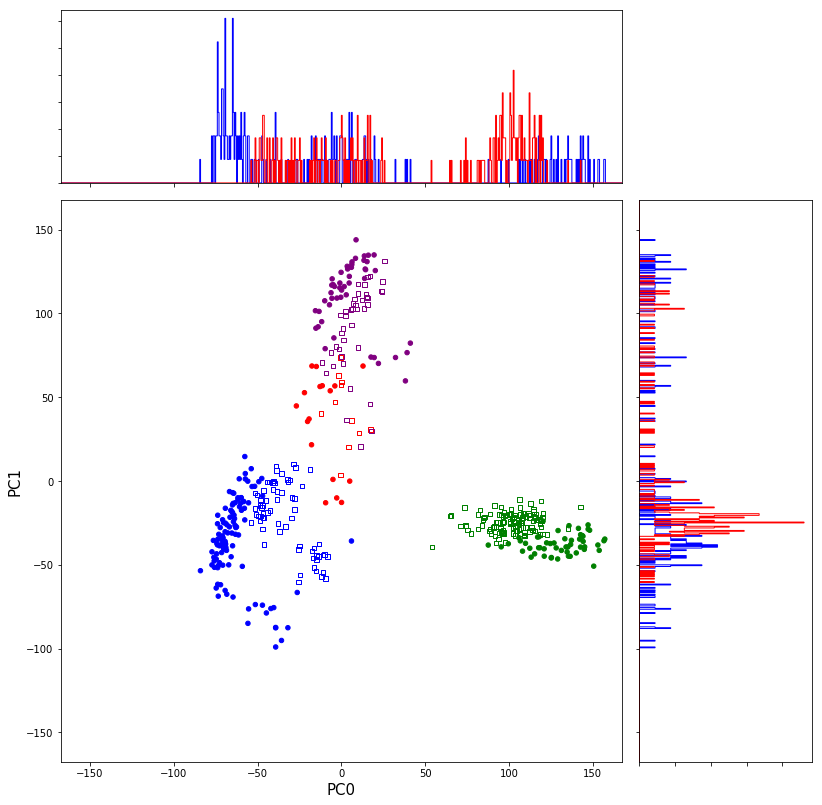

colors1 shape = (229,) colors2 shape = (239,)
x1 shape = (229,) x2 shape = (229,)
y1 shape = (239,) y2 shape = (239,)


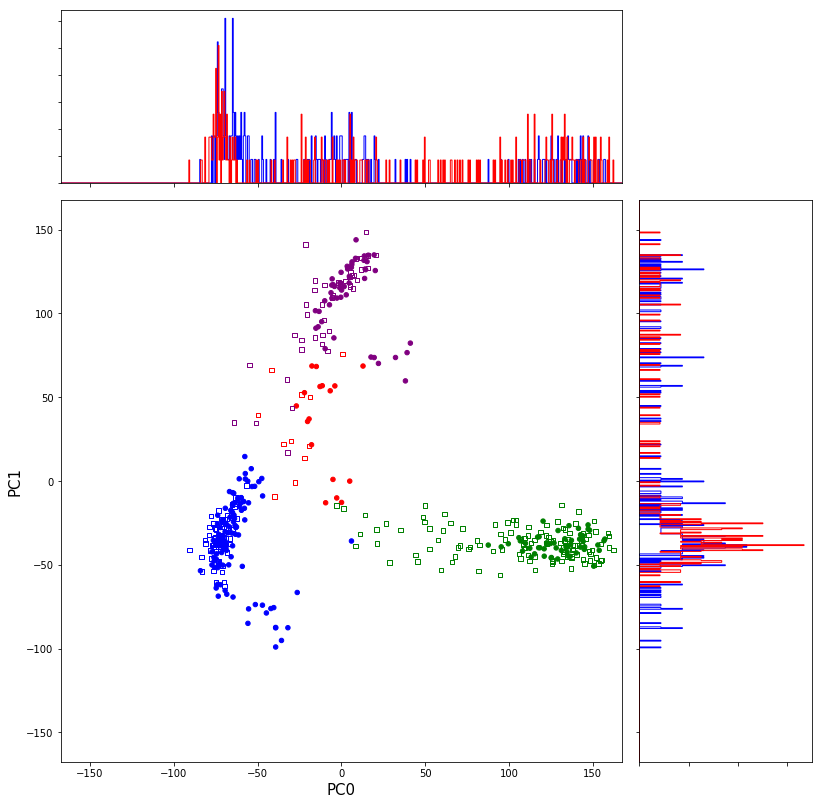

In [278]:
# before
multiScatterHist(target_sample_pca[:,pc1], target_sample_pca[:,pc2], projection_before[:,pc1], 
               projection_before[:,pc2], tcga_colors, gtex_colors, axis1, axis2)

# after
multiScatterHist(target_sample_pca[:,pc1], target_sample_pca[:,pc2], projection_after[:,pc1], 
               projection_after[:,pc2], tcga_colors, gtex_colors, axis1, axis2)

In [282]:
from mpl_toolkits.mplot3d import Axes3D

def multiDScatter(x1, x2, x3, y1, y2, y3, colors1, colors2, axis1='', axis2='', axis3=''):    
    # definitions for the axes
#     left, width = 0.1, 0.65
#     bottom, height = 0.1, 0.65
#     bottom_h = left_h = left + width + 0.02
    
#     rect_scatter = [left, bottom, width, height]

    print("colors1 shape = " + str(colors1.shape) + " colors2 shape = " + str(colors2.shape))
    print("x1 shape = " + str(x1.shape) + " x2 shape = " + str(x2.shape) + " x3 shape = " + str(x3.shape))
    print("y1 shape = " + str(y1.shape) + " y2 shape = " + str(y2.shape) + " y3 shape = " + str(y3.shape))
    
    # start with a rectangular Figure
    fig = plt.figure(figsize=(12, 12))
       
    #axScatter = plt.axes(rect_scatter)
    axScatter = fig.add_subplot(111, projection='3d')
    
    # the scatter plot:
    axScatter.scatter(x1, x2, x3, color=colors1, marker='o', s=20)
    axScatter.scatter(y1, y2, y3, color=colors2, marker='s', facecolors='none', s=20)
#     axScatter.scatter(x1, x2, x3, color='blue', marker='o')
#     axScatter.scatter(y1, y2, y3, color='red', marker='s') 


    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(x2))]) + 10
    lim = (int(xymax/binwidth) + 1) * binwidth
    
    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))
    axScatter.set_zlim((-lim, lim))
    
    axScatter.set_xlabel(axis1, fontsize=15)
    axScatter.set_ylabel(axis2, fontsize=15)
    axScatter.set_zlabel(axis3, fontsize=15)

    plt.show()

In [283]:
print("targetpca1 shape = " + str(target_sample_pca[:,pc1].shape))
print("targetpca2 shape = " + str(target_sample_pca[:,pc2].shape))
print("targetpca3 shape = " + str(target_sample_pca[:,pc3].shape))

print("sourcepc1 shape = " + str(projection_before[:,pc1].shape))
print("sourcepc2 shape = " + str(projection_before[:,pc2].shape))
print("sourcepc3 shape = " + str(projection_before[:,pc3].shape))

targetpca1 shape = (229,)
targetpca2 shape = (229,)
targetpca3 shape = (229,)
sourcepc1 shape = (239,)
sourcepc2 shape = (239,)
sourcepc3 shape = (239,)


colors1 shape = (229,) colors2 shape = (239,)
x1 shape = (229,) x2 shape = (229,) x3 shape = (229,)
y1 shape = (239,) y2 shape = (239,) y3 shape = (239,)


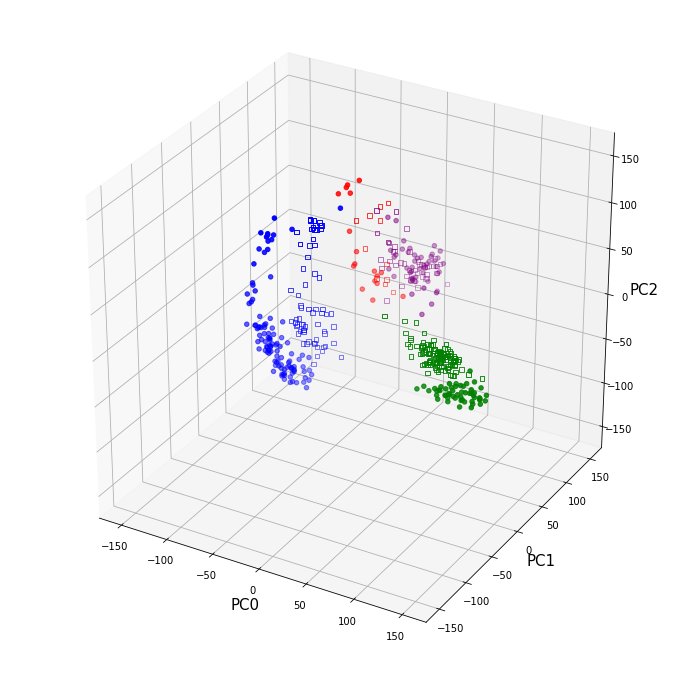

colors1 shape = (229,) colors2 shape = (239,)
x1 shape = (229,) x2 shape = (229,) x3 shape = (229,)
y1 shape = (239,) y2 shape = (239,) y3 shape = (239,)


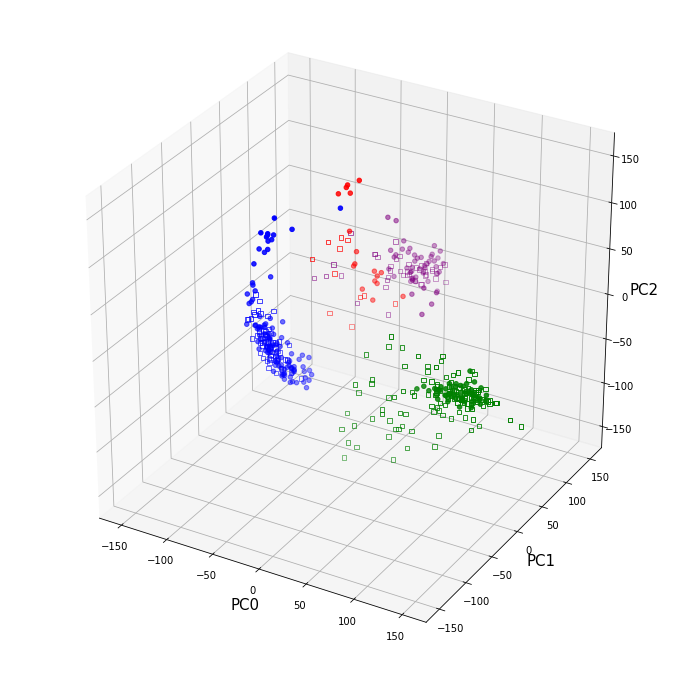

In [285]:
# before
multiDScatter(target_sample_pca[:,pc1], target_sample_pca[:,pc2], target_sample_pca[:,pc3], 
              projection_before[:,pc1], projection_before[:,pc2], projection_before[:,pc3],
              tcga_colors, gtex_colors, axis1, axis2, axis3)
# after
multiDScatter(target_sample_pca[:,pc1], target_sample_pca[:,pc2], target_sample_pca[:,pc3], 
              projection_after[:,pc1], projection_after[:,pc2], projection_after[:,pc3],
              tcga_colors, gtex_colors, axis1, axis2, axis3)